# Animal Monitoring AI Project

About Dataset - this dataset comprises multiple sensor data from four goats
and two sheep. The data contain the following motion sensors:

* 3-axes accelerometer
* 3-axes high-intensity accelerometer
* 3-axes gyroscope
* 3-axes compass (magnetometer)
* Temperature
* Barometric pressure

## Loading Dataset

In [3]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Define paths
sheep_path = "/Users/shreyanair/AnimalCollarAI/Data/Sheep"
goat_path = "/Users/shreyanair/AnimalCollarAI/Data/Goat"


# Initialize an empty list to store DataFrames
dfs_sheep = []
dfs_goat = []

In [5]:

# Load Sheep Data
sheep_files = os.listdir(sheep_path)
for file_name in sheep_files:
    if file_name.endswith('.csv'):
        file_path = os.path.join(sheep_path, file_name)
        df = pd.read_csv(file_path)
        dfs_sheep.append(df)

In [6]:

# Load Goat Data
goat_files = os.listdir(goat_path)
for file_name in goat_files:
    if file_name.endswith('.csv'):
        file_path = os.path.join(goat_path, file_name)
        df = pd.read_csv(file_path)
        dfs_goat.append(df)


In [7]:
# Concatenate all Sheep and Goat DataFrames
data_sheep = pd.concat(dfs_sheep, ignore_index=True)
data_goat = pd.concat(dfs_goat, ignore_index=True)

# Display the first few rows of the merged datasets
print("Sheep Data:")
print(data_sheep.head())

print("\nGoat Data:")
print(data_goat.head())

Sheep Data:
     label animal_ID  segment_ID  timestamp_ms       ax       ay       az  \
0  walking        S2           1             1  3.44047  6.95037 -6.02142   
1  walking        S2           1             6  3.75890  7.29274 -6.34224   
2  walking        S2           1            11  4.11324  7.58244 -6.71574   
3  walking        S2           1            16  4.45322  7.81946 -7.05571   
4  walking        S2           1            21  4.76925  8.06367 -7.45315   

      axhg     ayhg      azhg      cx      cy      cz       gx       gy  \
0  6.69733  13.2745  1.081180     NaN     NaN     NaN  66.5854  74.0854   
1  3.18348  13.4547  0.480526 -1.5690  0.0150  1.0860  70.9756  74.6341   
2  7.80855  12.2534  1.591740     NaN     NaN     NaN  75.3049  74.9390   
3  5.46598  13.5448  0.330362 -1.5915  0.0075  1.0845  79.5122  75.1829   
4  7.11779  13.1244 -3.033320     NaN     NaN     NaN  83.1098  75.9756   

        gz  pressure   temp  
0 -86.4634   1007.22  28.45  
1 -80.4268    

## Data Cleaning and handling missing values

In [8]:
# Define a function to plot missing value heatmap
def plot_missing_heatmap(data):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Value Heatmap')
    plt.show()

In [9]:
# Summary Statistics for Sheep Data
summary_statistics_sheep = data_sheep.describe()
print("\nSummary Statistics for Sheep Data:")
print(summary_statistics_sheep)


Summary Statistics for Sheep Data:
         segment_ID  timestamp_ms            ax            ay            az  \
count  4.965600e+06  4.965600e+06  4.965600e+06  4.965600e+06  4.965600e+06   
mean   3.664162e+02  6.216049e+06  2.664265e+00  6.056989e-01 -8.475271e+00   
std    1.414524e+02  3.599243e+06  2.737629e+00  5.230568e+00  4.197199e+00   
min    1.000000e+00  1.000000e+00 -7.845320e+01 -7.845320e+01 -7.845320e+01   
25%    2.830000e+02  3.103500e+06  1.369480e+00 -2.937690e+00 -9.581600e+00   
50%    3.740000e+02  6.206998e+06  2.743760e+00  1.403000e+00 -8.386890e+00   
75%    4.590000e+02  9.310497e+06  4.163520e+00  4.077330e+00 -7.369350e+00   
max    7.820000e+02  1.288802e+07  7.845080e+01  7.845080e+01  6.451420e+01   

               axhg          ayhg          azhg            cx            cy  \
count  4.965600e+06  4.965600e+06  4.965600e+06  2.482805e+06  2.482805e+06   
mean   6.001986e+00  5.838204e+00  6.909672e+00 -2.192814e-02 -2.028007e-01   
std    2.746885

In [10]:
# Check for missing values in Sheep Data
missing_values_sheep = data_sheep.isnull().sum()
total_entries = len(data_sheep)

# Calculate percentage of missing values
percentage_missing_values_sheep = (missing_values_sheep / total_entries) * 100

# Combine the counts and percentages into a DataFrame
missing_info_sheep = pd.DataFrame({'Missing Values': missing_values_sheep, 'Percentage': percentage_missing_values_sheep})

print("\nMissing Values in Sheep Data:")
print(missing_info_sheep)


Missing Values in Sheep Data:
              Missing Values  Percentage
label                      0    0.000000
animal_ID                  0    0.000000
segment_ID                 0    0.000000
timestamp_ms               0    0.000000
ax                         0    0.000000
ay                         0    0.000000
az                         0    0.000000
axhg                       0    0.000000
ayhg                       0    0.000000
azhg                       0    0.000000
cx                   2482795   49.999899
cy                   2482795   49.999899
cz                   2482795   49.999899
gx                         0    0.000000
gy                         0    0.000000
gz                         0    0.000000
pressure             4344925   87.500503
temp                       0    0.000000


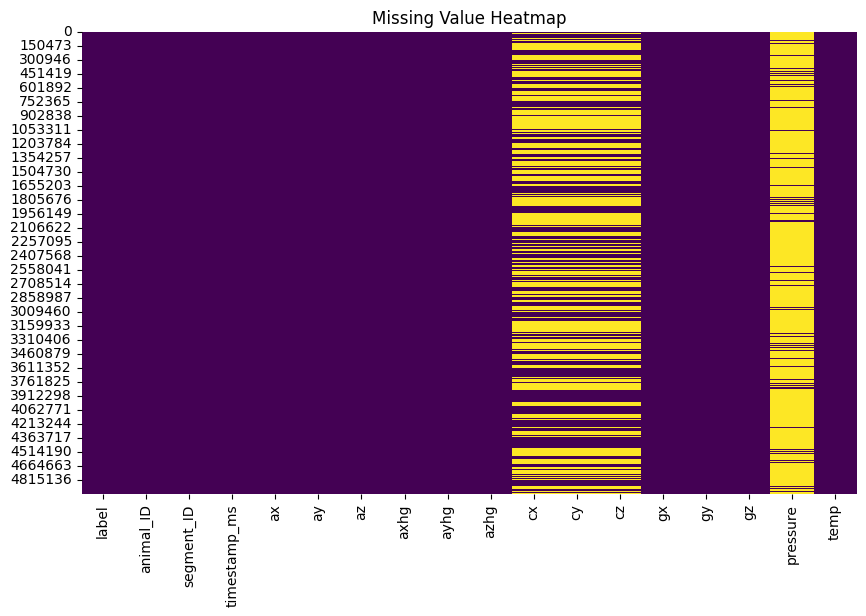

In [14]:
# Plot missing value heatmap for Sheep Data
plot_missing_heatmap(data_sheep)

In [16]:
# Checking the null value % for each sheep respectively.
print(data_sheep.where(data_sheep.animal_ID == data_sheep.animal_ID.unique()[0]).dropna(how="all").isnull().sum())

label                 0
animal_ID             0
segment_ID            0
timestamp_ms          0
ax                    0
ay                    0
az                    0
axhg                  0
ayhg                  0
azhg                  0
cx              1288797
cy              1288797
cz              1288797
gx                    0
gy                    0
gz                    0
pressure        2255411
temp                  0
dtype: int64


In [17]:
print(data_sheep.where(data_sheep.animal_ID == data_sheep.animal_ID.unique()[1]).dropna(how="all").isnull().sum())

label                 0
animal_ID             0
segment_ID            0
timestamp_ms          0
ax                    0
ay                    0
az                    0
axhg                  0
ayhg                  0
azhg                  0
cx              1193998
cy              1193998
cz              1193998
gx                    0
gy                    0
gz                    0
pressure        2089514
temp                  0
dtype: int64


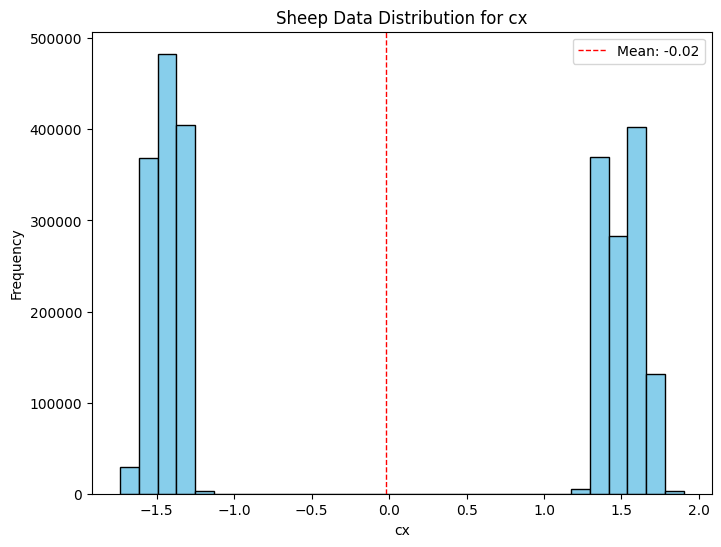

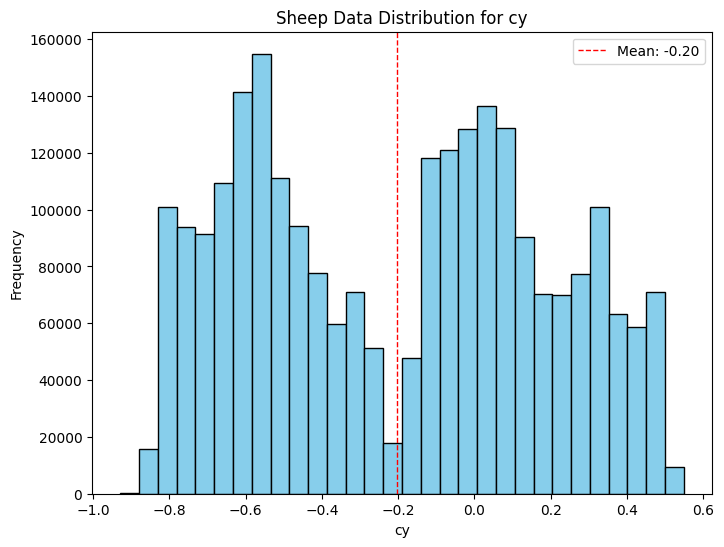

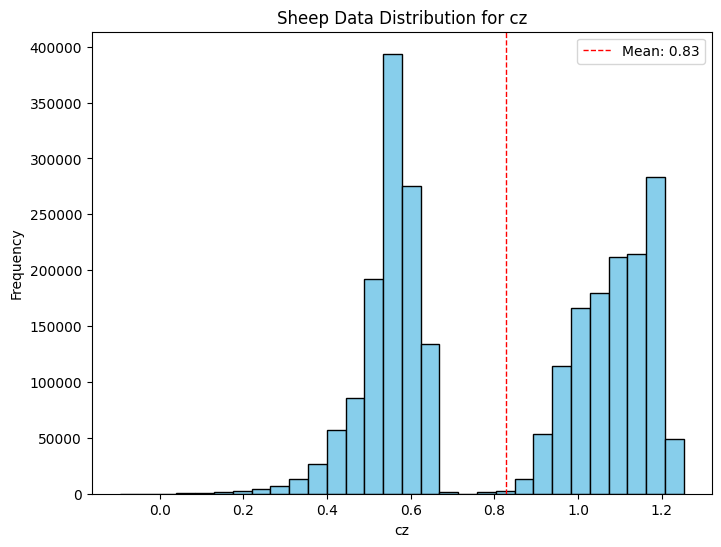

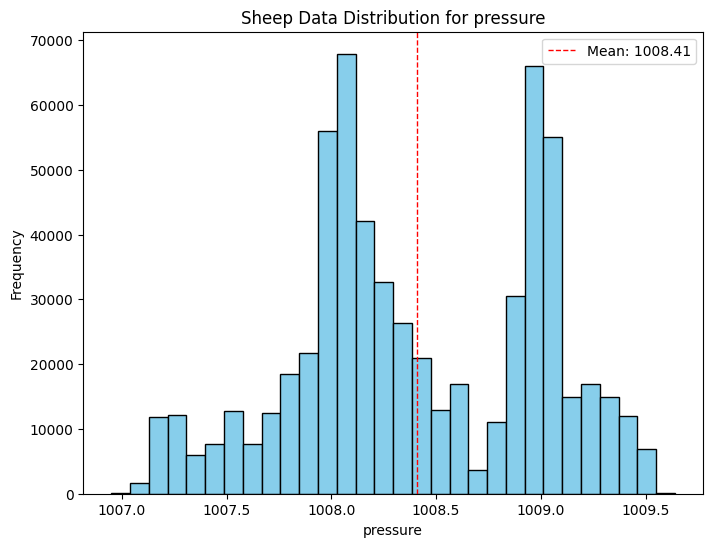

In [14]:
# Select the columns for plotting
columns_to_plot = ['cx', 'cy', 'cz', 'pressure']

# Loop through each column and plot its distribution
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(data_sheep[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    
    # Calculate and plot the mean
    mean_value = data_sheep[column].mean()
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
    
    plt.title(f'Sheep Data Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

<ins>**First observation:**</ins> In the sheep dataset, we can observe missing values in the columns cx, cy, cz, and pressure, representing the raw data from the compass x-, y-, z-, and barometer, respectively.

In [12]:
# Summary Statistics for Goat Data
summary_statistics_goat = data_goat.describe()
print("\nSummary Statistics for Goat Data:")
print(summary_statistics_goat)


Summary Statistics for Goat Data:
         segment_ID  timestamp_ms            ax            ay            az  \
count  8.812553e+06  8.812553e+06  8.812553e+06  8.812553e+06  8.812553e+06   
mean   4.037192e+02  5.526837e+06 -6.594125e-01 -7.024449e-01 -4.056410e+00   
std    1.650057e+02  3.213095e+06  6.404317e+00  3.912219e+00  6.581556e+00   
min    1.000000e+00  1.000000e+00 -7.845320e+01 -7.845320e+01 -7.845320e+01   
25%    3.060000e+02  2.753921e+06 -6.241680e+00 -3.366250e+00 -8.832210e+00   
50%    4.270000e+02  5.507846e+06 -1.295260e+00 -7.829040e-01 -6.121970e+00   
75%    4.910000e+02  8.261766e+06  4.996700e+00  2.152390e+00  3.081340e+00   
max    9.290000e+02  1.196727e+07  7.845080e+01  7.845080e+01  7.845080e+01   

               axhg          ayhg          azhg            cx            cy  \
count  8.812553e+06  8.812553e+06  8.812553e+06  4.406268e+06  4.406268e+06   
mean   9.393682e-01  2.202816e+00  8.185974e+00  1.027224e+00 -1.138724e-01   
std    7.120828e

In [13]:
# Check for missing values in Sheep Data
missing_values_goat = data_goat.isnull().sum()
total_entries = len(data_goat)

# Calculate percentage of missing values
percentage_missing_values_goat = (missing_values_goat / total_entries) * 100

# Combine the counts and percentages into a DataFrame
missing_info_goat = pd.DataFrame({'Missing Values': missing_values_goat, 'Percentage': percentage_missing_values_goat})

print("\nMissing Values in Goat Data:")
print(missing_info_goat)


Missing Values in Goat Data:
              Missing Values  Percentage
label                      0    0.000000
animal_ID                  0    0.000000
segment_ID                 0    0.000000
timestamp_ms               0    0.000000
ax                         0    0.000000
ay                         0    0.000000
az                         0    0.000000
axhg                       0    0.000000
ayhg                       0    0.000000
azhg                       0    0.000000
cx                   4406285   50.000096
cy                   4406285   50.000096
cz                   4406285   50.000096
gx                         0    0.000000
gy                         0    0.000000
gz                         0    0.000000
pressure             7710997   87.500149
temp                       0    0.000000


In [ ]:
# Plot missing value heatmap for Goat Data
plot_missing_heatmap(data_goat)

When attempting to determine whether there is a pattern in the missing data, heatmaps are an excellent tool for visualization.

<ins>**Second observation:**</ins> In the goat dataset, we can observe missing values in the columns cx, cy, cz, and pressure, representing the raw data from the compass x-, y-, z-, and barometer, respectively.

<ins> Handling missing values: </ins> We will use imputation to handle the missing values in the columns cx, cy, and cz. Imputation techniques can be used because there is a lot of data that needs to be added to these columns. Replacing missing values in a column with the mean or median of the non-missing values is a popular approach.

In [ ]:
# For Sheep Data
data_sheep['cx'].fillna(data_sheep['cx'].mean(), inplace=True)
data_sheep['cy'].fillna(data_sheep['cy'].mean(), inplace=True)
data_sheep['cz'].fillna(data_sheep['cz'].mean(), inplace=True)

In [ ]:
# For Goat Data
data_goat['cx'].fillna(data_goat['cx'].mean(), inplace=True)
data_goat['cy'].fillna(data_goat['cy'].mean(), inplace=True)
data_goat['cz'].fillna(data_goat['cz'].mean(), inplace=True)

In [ ]:
# For Sheep Data
data_sheep['pressure'].fillna(data_sheep['pressure'].mean(), inplace=True)

# For Goat Data
data_goat['pressure'].fillna(data_goat['pressure'].mean(), inplace=True)

In [ ]:
#Verify if there is any remaining null value after imputation
print(data_sheep.isnull().sum())

In [ ]:
#Verify if there is any remaining null value after imputation
print(data_goat.isnull().sum())


We have addressed every missing value in the datasets for goats and sheep.

In [ ]:
# Class Distribution for Sheep Data
plt.figure(figsize=(8, 6))
data_sheep['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution for Sheep Data')
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.show()

In [ ]:
# Class Distribution for Goat Data
plt.figure(figsize=(8, 6))
data_goat['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution for Goat Data')
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.show()

In [ ]:
# Example: Correlation Heatmap for Sheep Data
corr_matrix_sheep = data_sheep[['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'pressure', 'temp']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_sheep, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Sheep Data')
plt.show()